In [1]:
#------ML course final assignment------
#In this project try to determine which basketball teams are most likely 
#to make it to the semifinal round of the College Basketball Tournament known as the Final Four.

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%206/cbb.csv')
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [3]:
df.shape

(1406, 24)

In [4]:
# Wins Above Bubble (refers to the cut off between making the NCAA March Madness Tournament & not making it).
# Add a column that will contain "true" if the wins above bubble are over 7 and "false" if not. 
# We'll call this column Win Index or "windex" for short.
df['winindex']= np.where(df.WAB >7, 'True', 'False')
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,winindex
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016,True
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016,True
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,False
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,True
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,True


In [5]:
#Filter the data set to the teams that made the Sweet Sixteen, the Elite Eight, and the Final Four 
#in the post season. We'll also create a new dataframe that will hold the values with the new column.
df1 = df.loc[df['POSTSEASON'].str.contains('S16|E8|F4', na = False)]
df1.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,winindex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,False
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,True
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,True
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,False
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,False


In [6]:
#how many teams are there
df1['POSTSEASON'].value_counts()

S16    32
E8     16
F4      8
Name: POSTSEASON, dtype: int64

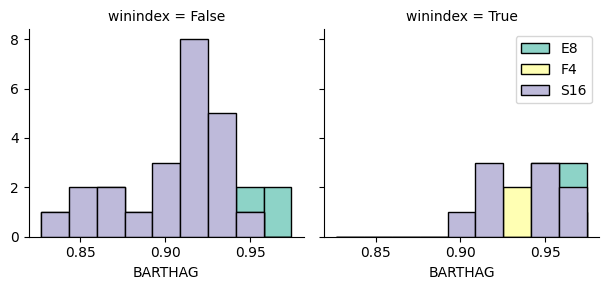

In [7]:
###Plot some data to understand it.
#Plot chance of winning an average Division I team

import seaborn as sns

bins = np.linspace(df1.BARTHAG.min(), df1.BARTHAG.max(), 10) #
g = sns.FacetGrid(df1, col="winindex", hue="POSTSEASON", palette="Set3", col_wrap=6)
g.map(plt.hist, 'BARTHAG', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

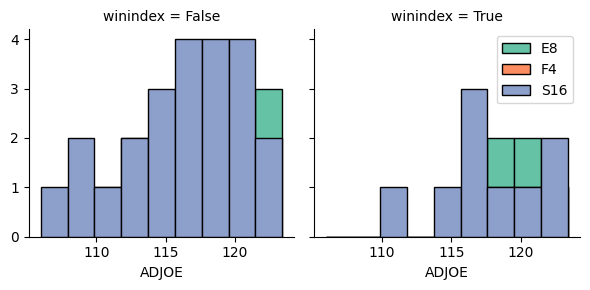

In [8]:
#Adjusted Offensive Efficiency (An estimate of the offensive efficiency 
#(points scored per 100 possessions) a team would have against the average Division I defense

bins = np.linspace(df1.ADJOE.min(), df1.ADJOE.max(), 10)
g = sns.FacetGrid(df1, col="winindex", hue="POSTSEASON", palette="Set2", col_wrap=2)
g.map(plt.hist, 'ADJOE', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

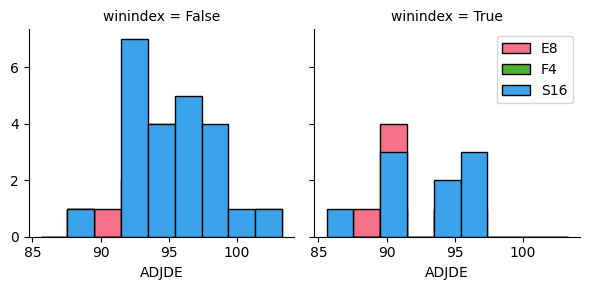

In [9]:
#Adjusted Defensive Efficiency (An estimate of the offensive efficiency 
#(points scored per 100 possessions) a team would have against the average Division I defense

bins = np.linspace(df1.ADJDE.min(), df1.ADJDE.max(), 10)
g = sns.FacetGrid(df1, col="winindex", hue="POSTSEASON", palette="husl", col_wrap=2)
g.map(plt.hist, 'ADJDE', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

#this doesnt impace much to get the team in the final four

In [10]:
####-----Preprocessing------

#Let's look at the postseason#
df1.head()
df1.groupby(['winindex'])['POSTSEASON'].value_counts(normalize=True)
df1.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,winindex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,False
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,True
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,True
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,False
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,False


In [11]:
# 13% of teams with 6 or less wins above bubble make it into the final four while 17% of teams with 7 or more do.
#Lets convert wins above bubble (winindex) under 7 to 0 and over 7 to 1:
df1['winindex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
df1.head()

/var/folders/0w/n0wcx9c51v37zxn7w2bsvrpr0000gn/T/ipykernel_6637/2217119031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['winindex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,winindex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,0
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,1
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,1
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,0
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,0


In [12]:
# These inputs are the parameters to train the  data set.
X = df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'winindex']]
X[0:5]

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,winindex
2,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,...,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,6.0,0
3,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,...,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,1.0,1
4,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,...,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,1.0,1
5,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,20.2,34.1,...,40.3,32.0,52.6,46.1,34.4,36.2,69.0,6.7,1.0,0
6,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,20.4,33.5,...,35.4,28.0,47.2,48.1,36.0,30.7,65.5,-0.3,10.0,0


In [13]:
#This is what we want to predict
y = df1['POSTSEASON'].values
y[0:10]

array(['E8', 'E8', 'E8', 'E8', 'F4', 'F4', 'S16', 'S16', 'S16', 'S16'],
      dtype=object)

In [14]:
## normalize the data
X= preprocessing.StandardScaler().fit(X).transform(X)
X

array([[-0.43331874, -1.26140173,  0.28034482, ..., -1.0448016 ,
         0.49716104, -0.6882472 ],
       [ 0.40343468,  0.35874728,  0.64758014, ...,  0.98050611,
        -1.14054592,  1.45296631],
       [ 0.40343468,  1.33083669,  0.87710222, ...,  1.94493836,
        -1.14054592,  1.45296631],
       ...,
       [ 1.2401881 , -0.93737193, -2.06078035, ..., -2.13782481,
         2.46240939, -0.6882472 ],
       [-1.27007215,  0.03471748,  0.18853599, ...,  0.56258548,
        -0.48546313,  1.45296631],
       [-0.43331874,  1.00680689,  1.31319416, ...,  1.39842675,
        -0.81300453,  1.45296631]])

In [15]:
#Train the data set
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size = 0.2, random_state =4)
print('Train set:', X_train.shape, Y_train.shape)
print('Test set:', X_val.shape, Y_val.shape)


Train set: (44, 21) (44,)
Test set: (12, 21) (12,)


In [16]:
#-------Here starts the classification---------
#Now, it is your turn, use the training set to build an accurate model. Then use the validation set to report the accuracy of the model You should use the following algorithm:

# 1) K Nearest Neighbor(KNN)
# 2) Decision Tree
# 3) Support Vector Machine
# 4) Logistic Regression

#--------Question 1: Question 1 Build a KNN model using a value of k = 5, 
#--------find the accuracy on the validation data (X_val and y_val)!

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

#Train the model and predict
k=5
neighbors = KNeighborsClassifier(n_neighbors = k).fit(X_train, Y_train) 
neighbors

yhat = neighbors.predict(X_val)
print(yhat)
print(Y_train)
xhat = neighbors.predict(X_train)
print(xhat)

#calculate the accuracy of the prediction
from sklearn import metrics
print("Train set accuracy:", metrics.accuracy_score(Y_train, xhat))
print("Test set accuracy: ", metrics.accuracy_score(Y_val, yhat))

print(Y_val)

['S16' 'S16' 'S16' 'E8' 'E8' 'E8' 'S16' 'F4' 'S16' 'S16' 'S16' 'S16']
['S16' 'E8' 'S16' 'S16' 'E8' 'E8' 'S16' 'F4' 'E8' 'E8' 'F4' 'S16' 'S16'
 'E8' 'S16' 'S16' 'S16' 'F4' 'S16' 'F4' 'S16' 'E8' 'S16' 'S16' 'E8' 'S16'
 'S16' 'S16' 'E8' 'E8' 'E8' 'S16' 'S16' 'S16' 'E8' 'E8' 'S16' 'S16' 'S16'
 'S16' 'S16' 'E8' 'F4' 'F4']
['S16' 'E8' 'E8' 'E8' 'E8' 'E8' 'E8' 'S16' 'E8' 'S16' 'S16' 'S16' 'S16'
 'E8' 'E8' 'S16' 'S16' 'E8' 'S16' 'F4' 'S16' 'E8' 'S16' 'E8' 'E8' 'S16'
 'E8' 'S16' 'S16' 'E8' 'E8' 'S16' 'S16' 'E8' 'E8' 'E8' 'E8' 'S16' 'S16'
 'S16' 'S16' 'S16' 'E8' 'E8']
Train set accuracy: 0.6363636363636364
Test set accuracy:  0.6666666666666666
['F4' 'S16' 'S16' 'S16' 'S16' 'E8' 'S16' 'F4' 'S16' 'E8' 'S16' 'S16']


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
['S16' 'S16' 'E8' 'S16' 'E8' 'F4' 'S16' 'S16' 'E8' 'S16' 'E8' 'S16']
Test set accuracy: 0.3333333333333333
['E8' 'S16' 'E8' 'E8' 'E8' 'E8' 'F4' 'F4' 'E8' 'S16' 'E8' 'S16']
Test set accuracy: 0.3333333333333333
['S16' 'S16' 'S16' 'E8' 'E8' 'E8' 'S16' 'E8' 'E8' 'S16' 'S16' 'S16']
Test set accuracy: 0.5
['E8' 'S16' 'S16' 'E8' 'E8' 'E8' 'S16' 'F4' 'E8' 'S16' 'S16' 'S16']
Test set accuracy: 0.5833333333333334
['S16' 'S16' 'S16' 'E8' 'E8' 'E8' 'S16' 'F4' 'S16' 'S16' 'S16' 'S16']
Test set accuracy: 0.6666666666666666
['E8' 'S16' 'S16' 'E8' 'E8' 'E8' 'S16' 'S16' 'S16' 'S16' 'S16' 'S16']
Test set accuracy: 0.5833333333333334
['E8' 'S16' 'S16' 'E8' 'E8' 'E8' 'S16' 'S16' 'S16' 'S16' 'S16' 'S16']
Test set accuracy: 0.5833333333333334
['S16' 'S16' 'S16' 'E8' 'S16' 'E8' 'S16' 'S16' 'S16' 'S16' 'S16' 'S16']
Test set accuracy: 0.6666666666666666
['E8' 'S16' 'S16' 'E8' 'E8' 'E8' 'S16' 'S16' 'S16' 'S16' 'S16' 'S16']
Test set accuracy: 0.5833333333333334
['S

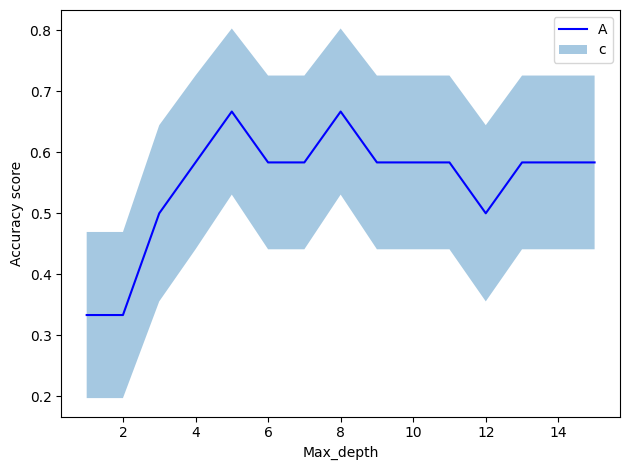

In [17]:
Ks = 16
mean_accuracy_KNN = np.zeros((Ks-1))
stdev_accuracy_KNN = np.zeros((Ks-1))
print(mean_accuracy_KNN)

for n in range (1,Ks):
    neighbors = KNeighborsClassifier(n_neighbors = n).fit(X_train, Y_train) 
    yhat_KNN = neighbors.predict(X_val)
    print(yhat_KNN)
    print("Test set accuracy:", metrics.accuracy_score(Y_val, yhat_KNN))
    mean_accuracy_KNN[n-1] = metrics.accuracy_score(Y_val, yhat_KNN)
    stdev_accuracy_KNN[n-1] = np.std(yhat_KNN == Y_val)/np.sqrt(yhat_KNN.shape[0])

mean_accuracy_KNN
stdev_accuracy_KNN

import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

plt.plot(range(1,Ks), mean_accuracy_KNN, 'blue')
plt.fill_between(range(1,Ks), mean_accuracy_KNN - 1 * stdev_accuracy_KNN, mean_accuracy_KNN + 1 * stdev_accuracy_KNN, alpha =0.4)
plt.legend('Accuracy test')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy score')
plt.tight_layout()
plt.show()

In [18]:
#-------Use decision tree algorigthm
from sklearn.tree import DecisionTreeClassifier

winningtree = DecisionTreeClassifier(criterion= 'entropy', max_depth = 4)
winningtree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [19]:
winningtree.fit(X_train, Y_train)

yhat_predictionTree = winningtree.predict(X_val)

print(yhat_predictionTree)
print(Y_val)

print("Decisiontree accuracy: ", metrics.accuracy_score(Y_val, yhat_predictionTree))

['S16' 'S16' 'E8' 'E8' 'S16' 'F4' 'E8' 'S16' 'E8' 'S16' 'S16' 'S16']
['F4' 'S16' 'S16' 'S16' 'S16' 'E8' 'S16' 'F4' 'S16' 'E8' 'S16' 'S16']
Decisiontree accuracy:  0.3333333333333333


In [20]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Retrieving notices: ...working... DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/notices.json HTTP/1.1" 404 None
DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/notices.json HTTP/1.1" 404 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/notices.json HTTP/1.1" 404 None
done
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Startin

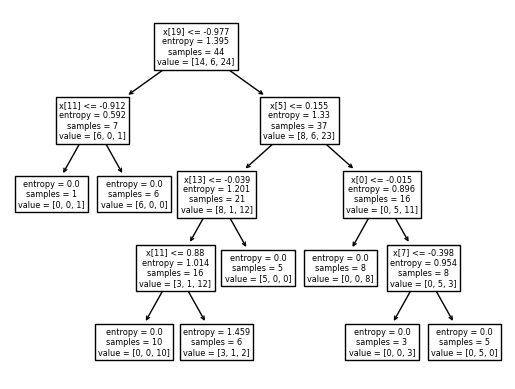

In [21]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(winningtree)
plt.show()

In [22]:
#--- Make a for loop to check for maximal depth 
Ks = 11
mean_accuracy = np.zeros((Ks-1))
stdev_accuracy = np.zeros((Ks-1))
print(mean_accuracy)

for n in range (1,Ks):
    winningtree = DecisionTreeClassifier(criterion= 'entropy', max_depth = n) # here the max_depth will be changed
    winningtree.fit(X_train, Y_train)
    yhat_predictionTree = winningtree.predict(X_val)
    #print(yhat_predictionTree)
    #print(Y_val)
    print("Decisiontree accuracy: ", metrics.accuracy_score(Y_val, yhat_predictionTree))
    mean_accuracy[n-1] = metrics.accuracy_score(Y_val, yhat_predictionTree)
    stdev_accuracy[n-1] = np.std(yhat_predictionTree == Y_val)/np.sqrt(yhat_predictionTree.shape[0])

mean_accuracy
stdev_accuracy

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Decisiontree accuracy:  0.6666666666666666
Decisiontree accuracy:  0.6666666666666666
Decisiontree accuracy:  0.5
Decisiontree accuracy:  0.3333333333333333
Decisiontree accuracy:  0.5
Decisiontree accuracy:  0.4166666666666667
Decisiontree accuracy:  0.4166666666666667
Decisiontree accuracy:  0.4166666666666667
Decisiontree accuracy:  0.5
Decisiontree accuracy:  0.4166666666666667


array([0.13608276, 0.13608276, 0.14433757, 0.13608276, 0.14433757,
       0.14231876, 0.14231876, 0.14231876, 0.14433757, 0.14231876])

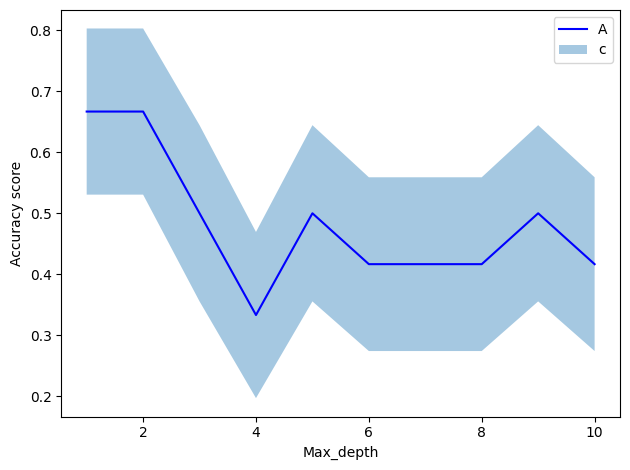

In [23]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

plt.plot(range(1,Ks), mean_accuracy, 'blue')
plt.fill_between(range(1,Ks), mean_accuracy - 1 * stdev_accuracy, mean_accuracy + 1 * stdev_accuracy, alpha =0.4)
plt.legend('Accuracy test')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy score')
plt.tight_layout()
plt.show()

In [24]:
#The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

#1.Linear - 'linear'
#2.Polynomial - 'poly'
#3.Radial basis function (RBF) - 'rbf'
#4.Sigmoid - 'sigmoid'
#5. - ‘precomputed’

from sklearn import svm
classpredict = svm.SVC(kernel='rbf')
classpredict.fit(X_train, Y_train)
yhat_rbf = classpredict.predict(X_val)
yhat_rbf
print("Test set accuracy 'RBF': ", metrics.accuracy_score(Y_val, yhat_rbf))

poly_classpredict = svm.SVC(kernel='poly')
poly_classpredict.fit(X_train, Y_train)
yhat_poly = poly_classpredict.predict(X_val)
yhat_poly
print("Test set accuracy 'Poly': ", metrics.accuracy_score(Y_val, yhat_poly))

sigmoid_classpredict = svm.SVC(kernel='sigmoid')
sigmoid_classpredict.fit(X_train, Y_train)
yhat_sigmoid = sigmoid_classpredict.predict(X_val)
yhat_sigmoid
print("Test set accuracy 'Sigmoid': ", metrics.accuracy_score(Y_val, yhat_sigmoid))

linear_classpredict = svm.SVC(kernel='linear')
linear_classpredict.fit(X_train, Y_train)
yhat_linear = linear_classpredict.predict(X_val)
yhat_linear
print("Test set accuracy 'Linear': ", metrics.accuracy_score(Y_val, yhat_linear))




Test set accuracy 'RBF':  0.5833333333333334
Test set accuracy 'Poly':  0.6666666666666666
Test set accuracy 'Sigmoid':  0.5833333333333334
Test set accuracy 'Linear':  0.25


In [47]:
#--------Predict using Linear model------------
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=0.01,solver ='liblinear').fit(X_train, Y_train)
LR
yhat_LR = LR.predict(X_val)
yhat_LRprob = LR.predict_proba(X_val)
yhat_LR
print("Test set accuracy 'LR': ", metrics.accuracy_score(Y_val, yhat_LR))
print("Test set jaccard score 'LR': ", jaccard_score(Y_val, yhat_LR, average='micro'))
print("Test set LR score 'LR': ", LR.score(X_val, Y_val))
print("Test set LR log loss 'LR': ", log_loss(X_val, yhat_LRprob))

Test set accuracy 'LR':  0.5833333333333334
Test set jaccard score 'LR':  0.4117647058823529
Test set LR score 'LR':  0.5833333333333334


ValueError: Multioutput target data is not supported with label binarization

In [39]:
#--------Model Evaluation-----------
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

# for f1_score set the average parameter to 'micro'
from sklearn.metrics import log_loss

print("F1-score 'KNN': ",f1_score(Y_val, yhat, average='micro'))
print("F1-score 'Prediction tree': ",f1_score(Y_val, yhat_predictionTree, average='micro'))
print("F1-score 'Poly': ",f1_score(Y_val, yhat_poly, average='micro'))
print("F1-score 'LR': ",f1_score(Y_val, yhat_LR, average='micro'))


print("Jaccard-score 'KNN': ",jaccard_score(Y_val, yhat, average='micro'))
print("Jaccard-score 'Prediction tree': ",jaccard_score(Y_val, yhat_predictionTree, average='micro'))
print("Jaccard-score 'Poly': ",jaccard_score(Y_val, yhat_poly, average='micro'))
print("Jaccard-score 'LR': ",jaccard_score(Y_val, yhat_LR, average='micro'))



F1-score 'KNN':  0.6666666666666666
F1-score 'Prediction tree':  0.4166666666666667
F1-score 'Poly':  0.6666666666666666
F1-score 'LR':  0.5833333333333334
Jaccard-score 'KNN':  0.5
Jaccard-score 'Prediction tree':  0.2631578947368421
Jaccard-score 'Poly':  0.5
Jaccard-score 'LR':  0.4117647058823529


In [40]:
def jaccard_index(predictions, true):
    if (len(predictions) == len(true)):
        intersect = 0;
        for x,y in zip(predictions, true):
            if (x == y):
                intersect += 1
        return intersect / (len(predictions) + len(true) - intersect)
    else:
        return -1
    

In [35]:
#----------------------Load test set for evaluation--------------

test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0120ENv3/Dataset/ML0101EN_EDX_skill_up/basketball_train.csv',error_bad_lines=False)
test_df.head()

/var/folders/0w/n0wcx9c51v37zxn7w2bsvrpr0000gn/T/ipykernel_6637/537098387.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0120ENv3/Dataset/ML0101EN_EDX_skill_up/basketball_train.csv',error_bad_lines=False)


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [36]:
test_df['winindex'] = np.where(test_df.WAB > 7, 'False', 'True')
test_df1 = test_df[test_df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
print(test_df1)
test_Feature = test_df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'winindex']]

test_Feature['winindex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
#test_Feature.loc[:,'windex']  = test_Feature.loc[:,'windex'].replace(['False', 'True'], [0, 1])
print(test_Feature)
test_X=test_Feature
test_X= preprocessing.StandardScaler().fit(test_X).transform(test_X)
test_X[0:5]

               TEAM CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
2        Notre Dame  ACC  36  24  118.3  103.3   0.8269   54.0   49.5  15.3   
3          Virginia  ACC  37  29  119.9   91.0   0.9600   54.8   48.4  15.1   
4            Kansas  B12  37  32  120.9   90.4   0.9662   55.7   45.1  17.8   
5            Oregon  P12  37  30  118.4   96.2   0.9163   52.3   48.9  16.1   
6          Syracuse  ACC  37  23  111.9   93.6   0.8857   50.0   47.3  18.1   
...             ...  ...  ..  ..    ...    ...      ...    ...    ...   ...   
1752           UCLA  P12  36  22  111.8   96.6   0.8425   49.6   48.5  17.6   
1753           Utah  P12  34  25  114.9   88.7   0.9513   55.2   43.0  18.2   
1754  West Virginia  B12  35  25  110.3   93.3   0.8733   46.1   52.7  18.7   
1755    Wichita St.  MVC  34  29  114.3   91.5   0.9277   50.3   45.8  15.0   
1756         Xavier   BE  37  23  115.7   95.1   0.9049   53.3   50.0  18.1   

      ...  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  POS

/var/folders/0w/n0wcx9c51v37zxn7w2bsvrpr0000gn/T/ipykernel_6637/3448462178.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_Feature['winindex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)


array([[-4.08074446e-01, -1.10135297e+00,  3.37365934e-01,
         2.66479976e+00, -2.46831661e+00,  2.13703245e-01,
         9.44090550e-01, -1.19216365e+00, -1.64348924e+00,
         1.45405982e-02,  1.29523097e+00, -6.23533182e-01,
        -9.31788560e-01,  1.42784371e-01,  1.68876201e-01,
         2.84500844e-01,  1.62625961e+00, -8.36649260e-01,
        -9.98500539e-01,  4.84319174e-01,  6.77003200e-01],
       [ 3.63958290e-01,  3.26326807e-01,  7.03145068e-01,
        -7.13778644e-01,  1.07370841e+00,  4.82633172e-01,
         4.77498943e-01, -1.32975879e+00, -6.86193316e-02,
        -7.35448152e-01, -1.35447914e+00, -8.06829025e-01,
         3.41737757e-01,  4.96641291e-02,  9.40576311e-02,
         1.37214061e+00,  6.93854620e-01, -2.00860931e+00,
         9.80549967e-01, -1.19401460e+00, -1.47709789e+00],
       [ 3.63958290e-01,  1.18293467e+00,  9.31757027e-01,
        -8.78587347e-01,  1.23870131e+00,  7.85179340e-01,
        -9.22275877e-01,  5.27775662e-01, -1.86734575e

In [37]:
test_y = test_df1['POSTSEASON'].values
test_y[0:5]

array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object)

In [41]:
test_y_KNN = neighbors.predict(test_X)
print(test_y_KNN)
print(test_X)

print("F1-score 'KNN': ",f1_score(test_X, test_y_KNN, average = 'weighted'))
print("Jaccard-score 'KNN': ",jaccard_score(test_X, test_y_KNN))




['S16' 'S16' 'E8' 'S16' 'S16' 'S16' 'S16' 'S16' 'S16' 'S16' 'S16' 'S16'
 'S16' 'S16' 'S16' 'S16' 'E8' 'E8' 'S16' 'S16' 'S16' 'S16' 'S16' 'S16'
 'E8' 'S16' 'S16' 'S16' 'E8' 'S16' 'S16' 'S16' 'S16' 'S16' 'S16' 'S16'
 'S16' 'E8' 'S16' 'E8' 'S16' 'S16' 'E8' 'S16' 'S16' 'S16' 'E8' 'E8' 'S16'
 'S16' 'S16' 'S16' 'S16' 'S16' 'S16' 'S16' 'E8' 'S16' 'S16' 'S16' 'E8'
 'S16' 'E8' 'S16' 'S16' 'S16' 'S16' 'S16' 'S16' 'S16']
[[-0.40807445 -1.10135297  0.33736593 ... -0.99850054  0.48431917
   0.6770032 ]
 [ 0.36395829  0.32632681  0.70314507 ...  0.98054997 -1.1940146
  -1.47709789]
 [ 0.36395829  1.18293467  0.93175703 ...  1.92295497 -1.1940146
  -1.47709789]
 ...
 [-1.18010718 -0.81581702 -1.49152974 ... -0.43305754  0.14865242
   0.6770032 ]
 [-1.95213992  0.32632681 -0.5770819  ... -0.40164404  0.81998593
   0.6770032 ]
 [ 0.36395829 -1.38688893 -0.25702516 ... -1.31263554  0.48431917
   0.6770032 ]]


ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [42]:
test_y_decision = winningtree.predict(test_X)

print("F1-score 'Decision tree': ",f1_score(test_X, test_y_decision, average='micro'))
print("Jaccard-score 'Decision tree': ",jaccard_score(test_X, test_y_decision, average='micro'))

ValueError: Classification metrics can't handle a mix of continuous-multioutput and multiclass targets